# Exercise 6: Support Vector Machines (SVMs)

In this exercise, the Support Vector Machine (SVM) model is implemented. It has two major parts:
1. SVM model implemenation
2. Email Spam Classifier implementation

Files provided by Coursera, located under `../exercises/ex1-ex8-octave/ex6`

- `ex6.m` - Octave/MATLAB script that steps you through the exercise
- `ex6data1.mat` - Example Dataset 1
- `ex6data2.mat` - Example Dataset 2
- `ex6data3.mat` - Example Dataset 3
- `svmTrain.m` - SVM training function
- `svmPredict.m` - SVM prediction function 
- `plotData.m` - Plot 2D data
- `visualizeBoundaryLinear.m` - Plot linear boundary 
- `visualizeBoundary.m` - Plot non-linear boundary
- `linearKernel.m` - Linear kernel for SVM
- `ex6_spam.m` - Octave/MATLAB script for the second half of the exercise
- `spamTrain.mat` - Spam training set
- `spamTest.mat` - Spam test set
- `emailSample1.txt` - Sample email 1
- `emailSample2.txt` - Sample email 2
- `spamSample1.txt` - Sample spam 1
- `spamSample2.txt` - Sample spam 2
- `vocab.txt` - Vocabulary list
- `getVocabList.m` - Load vocabulary list
- `porterStemmer.m` - Stemming function
- `readFile.m` - Reads a file into a character string
- `submit.m` - Submission script that sends your solutions to our servers

Files to complete:

- `gaussianKernel.m` - Gaussian kernel for SVM
- `dataset3Params.m` - Parameters to use for Dataset 3
- `processEmail.m` - Email preprocessing
- `emailFeatures.m` - Feature extraction from emails

Workflow:

- Download latest Octave version of exercise from Coursera
- Complete code in exercise files following `ex6.pdf`
- Whenever an exercise part is finished
  - Check it with `ex6` and `ex6_spam` in Octave terminal
  - Create a submission token on Coursera (exercise submission page, it lasts 30 minutes)
  - Execute `submit` in Octave terminal
  - Introduce email and token
  - Results appear

**Overview of contents:**

0. Setup: `gnuplot`
1. Dataset Loading & Visualization
2. SVM Model Implementation - `ex6.m`
    - 2.1 The Effect of the `C` Regularization Factor
    - 2.2 SVM with Gaussian Kernels - `gaussianKernel.m`
    - 2.3 Plotting Datasets with Nonlinear Boundaries
    - 2.4 Search of Optimum `C` and `sigma` Parameters with the Cross-Validation Set - `dataset3Params.m`
3. Spam Classification (Emails) - `ex6_spam.m`

## 0. Setup: `gnuplot`

In [17]:
graphics_toolkit ("gnuplot");

In [18]:
%plot -b inline:gnuplot

## 1. Dataset Loading & Visualization

In [19]:
% Load from ex6data1: 
% You will have X, y in your environment
load('ex6data1.mat');

In [20]:
who

Variables visible from the current scope:

X    ans  y



In [21]:
size(X)

ans =

   51    2



In [22]:
size(y)

ans =

   51    1



In [30]:
% Plotting function from ex6.m
function plotData_(X, y)
    pos = find(y == 1); neg = find(y == 0);
    plot(X(pos, 1), X(pos, 2), 'k+','LineWidth', 1, 'MarkerSize', 7)
    hold on;
    plot(X(neg, 1), X(neg, 2), 'ko', 'MarkerFaceColor', 'y', 'MarkerSize', 7)
    hold off;
end

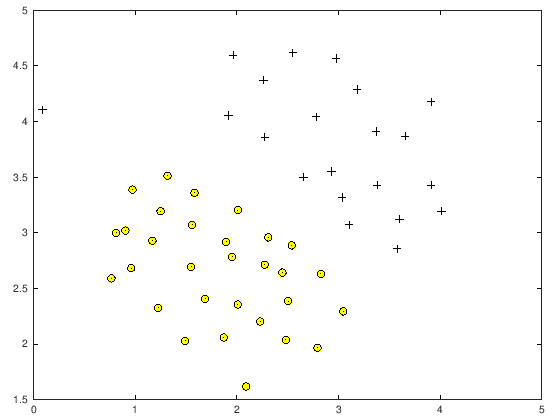

In [31]:
plotData_(X, y)

## 2. SVM Model Implementation - `ex6.m`

### 2.1 The Effect of the `C` Regularization Factor

Note that for training functions provided in the exercise material are used:
- `svmTrain.m` (not really optimized, but implemented for compatibility)
- `visualizeBoundaryLinear.m`


Training ......................................................................
...............................................................................
...............................................................................
...............................................................................
...............................................................................
...............................................................................
...............................................................................
...............................................................................
...............................................................................
...............................................................................
...............................................................................
....................................................................... Done! 



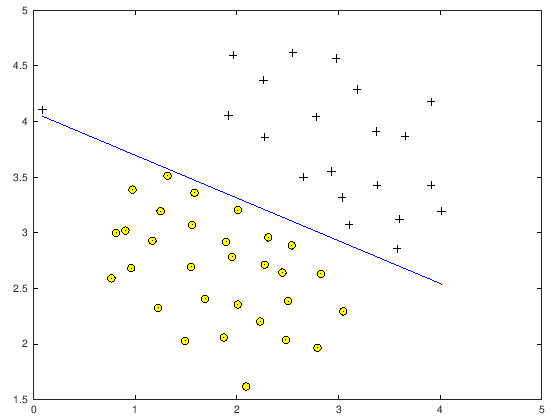

In [32]:
% Try different C values
% Larger C values fit more or all the data points / examples
% but they seem to be accomoddating to the noise (i.e., less natural)
C = 100;
model = svmTrain(X, y, C, @linearKernel, 1e-3, 20);
visualizeBoundaryLinear(X, y, model);

### 2.2 SVM with Gaussian Kernels - `gaussianKernel.m`

$$ K_{\text{gaussian}} \left( x^{(i)}, x^{(j)} \right) = \exp \left( - \frac{\left\lvert\left\lvert x^{(i)} - x^{(j)}\right\lvert\right\lvert^2}{2\sigma^2} \right) = \exp \left( -\frac{\sum_{k=1}^n \left( x_k^{(i)} - x_k^{(j)}\right)^2}{2\sigma^2} \right)$$

In [36]:
% Gaussian Kernel = Radial Basis Function (RBF)
function sim = gaussianKernel_(x1, x2, sigma)
    % Ensure that x1 and x2 are column vectors
    x1 = x1(:); x2 = x2(:);
    % Initialize
    sim = 0;
    % Distance between variable (x1) and landmark (x2)
    d = x1 - x2;
    % Gaussian
    sim = exp(-(d'*d)/(2*sigma*sigma));
end

In [37]:
x1 = [1 2 1];
x2 = [0 4 -1];
sigma = 2;
sim = gaussianKernel_(x1, x2, sigma);

In [38]:
sim

sim = 0.3247


### 2.3 Plotting Datasets with Nonlinear Boundaries

In [39]:
% You will have X, y in your environment
load('ex6data2.mat');

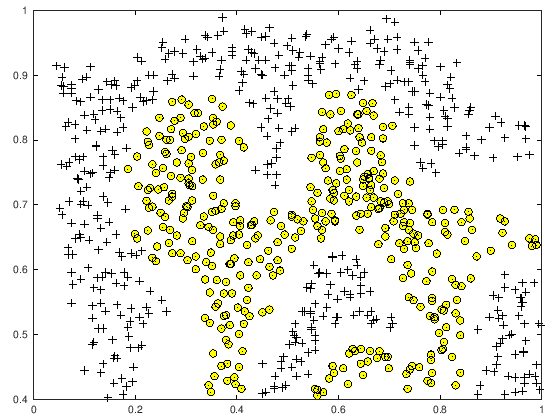

In [40]:
% Plot training data
plotData(X, y);

In [41]:
% SVM Parameters
C = 1;
sigma = 0.1;

In [42]:
% We set the tolerance and max_passes lower here so that the code will run
% faster. However, in practice, you will want to run the training to
% convergence.
model= svmTrain(X, y, C, @(x1, x2) gaussianKernel(x1, x2, sigma)); 


Training ......................................................................
...............................................................................
...............................................................................
...............................................................................
...............................................................................
...............................................................................
.............................................................. Done! 



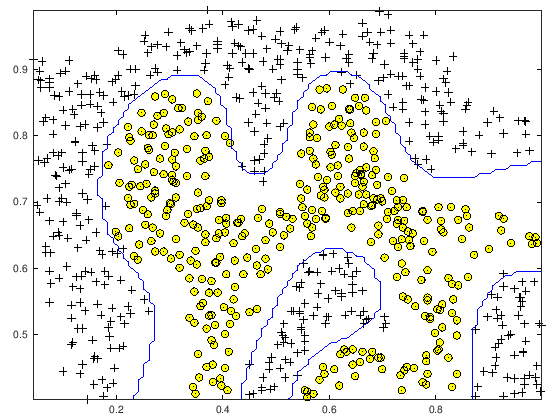

In [43]:
visualizeBoundary(X, y, model);

In [44]:
% Load from ex6data3: 
% You will have X, y in your environment
load('ex6data3.mat');

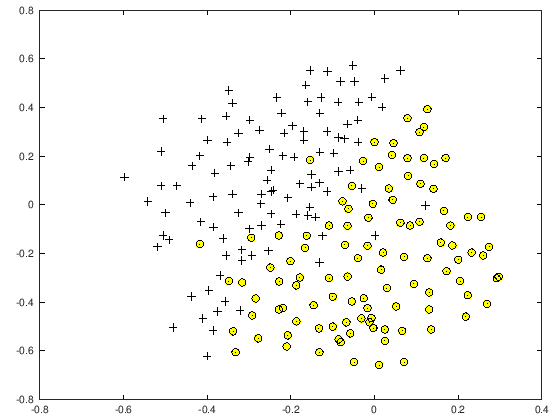

In [45]:
% Plot training data
plotData(X, y);

### 2.4 Search of Optimum `C` and `sigma` Parameters with the Cross-Validation Set - `dataset3Params.m`

In [49]:
clear all;
load('ex6data3.mat');

In [50]:
who

Variables visible from the current scope:

X     Xval  y     yval



In [81]:
function [C, sigma] = dataset3Params_(X, y, Xval, yval)
    % [C, sigma] = DATASET3PARAMS(X, y, Xval, yval) returns the optimal choice of C and 
    % sigma based on a cross-validation set.

    % Initialize return variables
    C = 0.01;
    sigma = 0.01;

    % Possible C & sigma values
    C_pool = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30];
    sigma_pool = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30];
    % Accuracy for each C-sigma combination
    accuracy = zeros(1,size(C_pool,2)*size(sigma_pool,2));
    max_accuracy = 0;
    count = 1;
    for i = 1:size(C_pool,2)
        for j = 1:size(sigma_pool,2)
            % Choose params
            c = C_pool(i);
            s = sigma_pool(j);
            % Train with training set
            model = svmTrain(X, y, c, @(x1, x2) gaussianKernel(x1, x2, s));
            % Cross-Validation: accuracy?
            pred = svmPredict(model, Xval);
            acc = mean(double(pred == yval));
            accuracy(1,count) = acc;
            % Choose if best pair (best accuracy so far)
            if acc > max_accuracy
                max_accuracy = acc;
                C = c;
                sigma = s;
            end
            % Increase C-sigma combination counter
            count = count + 1;
        end
    end
end

In [ ]:
[C, sigma] = dataset3Params(X, y, Xval, yval);

In [79]:
C

C = 1


In [80]:
sigma

sigma = 0.1000


## 3. Spam Classification (Emails) - `ex6_spam.m`

Dataset downloaded from the [SpamAssassin Public Corpus](https://spamassassin.apache.org/old/publiccorpus/). Onely email body texts analyzed.

Email texts are first pre-processed using `processEmail.m`, which performs the following modifications:
- convert to lower-case
- remove HTML tags
- replace URLs by "httpaddr"
- replace email addresses by "emailaddr"
- replace numvers by "number"
- raplace dollar signs by "dollar"
- stemming: words are reduced to their stemmed form using the Porter algoithm, implemented in `porterStemmer.m`
- remove non-words (e.g., punctuation), and trim white spaces (e.g., tabs) to a single white space


### 3.1 Mapping Words to Vocabulary Items/Ids - `processEmail.m`

The words of the pre-processed text need to be converted to vocabulary ids from a fixed vocabulary consisting of 1899 words and defined in `vocab.txt`.

In [89]:
function word_indices = processEmail_(email_contents)
    %PROCESSEMAIL preprocesses a the body of an email and
    %returns a list of word_indices: list of indices associated to the words

    % Load Vocabulary
    vocabList = getVocabList();

    % Init return value
    word_indices = [];

    % ========================== Preprocess Email ===========================

    % Find the Headers ( \n\n and remove )
    % Uncomment the following lines if you are working with raw emails with the
    % full headers

    % hdrstart = strfind(email_contents, ([char(10) char(10)]));
    % email_contents = email_contents(hdrstart(1):end);

    % Lower case
    email_contents = lower(email_contents);

    % Strip all HTML
    % Looks for any expression that starts with < and ends with > and replace
    % and does not have any < or > in the tag it with a space
    email_contents = regexprep(email_contents, '<[^<>]+>', ' ');

    % Handle Numbers
    % Look for one or more characters between 0-9
    email_contents = regexprep(email_contents, '[0-9]+', 'number');

    % Handle URLS
    % Look for strings starting with http:// or https://
    email_contents = regexprep(email_contents, ...
                               '(http|https)://[^\s]*', 'httpaddr');

    % Handle Email Addresses
    % Look for strings with @ in the middle
    email_contents = regexprep(email_contents, '[^\s]+@[^\s]+', 'emailaddr');

    % Handle $ sign
    email_contents = regexprep(email_contents, '[$]+', 'dollar');


    % ========================== Tokenize Email ===========================

    % Output the email to screen as well
    fprintf('\n==== Processed Email ====\n\n');

    % Process file
    l = 0;

    while ~isempty(email_contents)

        % Tokenize and also get rid of any punctuation
        [str, email_contents] = ...
           strtok(email_contents, ...
                  [' @$/#.-:&*+=[]?!(){},''">_<;%' char(10) char(13)]);

        % Remove any non alphanumeric characters
        str = regexprep(str, '[^a-zA-Z0-9]', '');

        % Stem the word 
        % (the porterStemmer sometimes has issues, so we use a try catch block)
        try str = porterStemmer(strtrim(str)); 
        catch str = ''; continue;
        end;

        % Skip the word if it is too short
        if length(str) < 1
           continue;
        end

        % Look up the word in the dictionary and add to word_indices if
        % found
        all_words = length(vocabList);
        for w = 1:all_words
            if (strcmp(vocabList{w},str))
                word_indices = [word_indices ; w];
                break;
            end
        end

        % Print to screen, ensuring that the output lines are not too long
        if (l + length(str) + 1) > 78
            fprintf('\n');
            l = 0;
        end
        fprintf('%s ', str);
        l = l + length(str) + 1;

    end

    % Print footer
    fprintf('\n\n=========================\n');

end


In [91]:
% Extract Features
file_contents = readFile('emailSample1.txt');
word_indices  = processEmail_(file_contents);
% Print Stats
fprintf('Word Indices: \n');
fprintf(' %d', word_indices);
fprintf('\n\n');


==== Processed Email ====

anyon know how much it cost to host a web portal well it depend on how mani 
visitor you re expect thi can be anywher from less than number buck a month 
to a coupl of dollarnumb you should checkout httpaddr or perhap amazon ecnumb 
if your run someth big to unsubscrib yourself from thi mail list send an 
email to emailaddr 

Word Indices: 
 86 916 794 1077 883 370 1699 790 1822 1831 883 431 1171 794 1002 1893 1364 592 1676 238 162 89 688 945 1663 1120 1062 1699 375 1162 479 1893 1510 799 1182 1237 810 1895 1440 1547 181 1699 1758 1896 688 1676 992 961 1477 71 530 1699 531



### 3.2 Extracting Features from Emails - `emailFeatures.m`

We convert each email consisting of item/token ids to a vector of length 1899 (vocabulary size) with values $x_i = {0,1}$, depending whether the $i$-th token is in the email body or not:

$$ x = \begin{bmatrix} 
0 & \dots & 1 & 0 & \dots & 1 & 0 & \dots & 0 
\end{bmatrix}^T \in \mathbb{R}^n
$$

In other words, the email is converted to the variable $x$.

In [93]:
function x = emailFeatures_(word_indices)
    % x = EMAILFEATURES(word_indices) takes in a word_indices vector and 
    % produces a feature vector from the word indices. 

    % Total number of words in the dictionary
    n = 1899;

    % You need to return the following variables correctly.
    x = zeros(n, 1);

    for w = 1:length(word_indices)
        x(word_indices(w)) = 1;
    end
end


In [94]:
file_contents = readFile('emailSample1.txt');
word_indices  = processEmail_(file_contents);


==== Processed Email ====

anyon know how much it cost to host a web portal well it depend on how mani 
visitor you re expect thi can be anywher from less than number buck a month 
to a coupl of dollarnumb you should checkout httpaddr or perhap amazon ecnumb 
if your run someth big to unsubscrib yourself from thi mail list send an 
email to emailaddr 



In [96]:
x = emailFeatures_(word_indices);

In [97]:
sum(x)

ans = 45


### 3.3 Training SVM for Spam Classification

In [98]:
% Load the Spam Email dataset: Already pre-processing and featurized email texts
% You will have X, y in your environment
load('spamTrain.mat');
% Train
fprintf('\nTraining Linear SVM (Spam Classification)\n')
fprintf('(this may take 1 to 2 minutes) ...\n')
C = 0.1;
model = svmTrain(X, y, C, @linearKernel);
% Predict
p = svmPredict(model, X);
fprintf('Training Accuracy: %f\n', mean(double(p == y)) * 100);


Training Linear SVM (Spam Classification)
(this may take 1 to 2 minutes) ...

Training ......................................................................
...............................................................................
...............................................................................
................................................................ Done! 

Training Accuracy: 99.825000


### 3.4 Top Predictors for Spam

In [99]:
% Since we have a SVM with alinear kernel
% we can have a look at the largest most positive parameter values,
% which will be the top predictors for spam!!
% So: Sort the weights and obtain the vocabulary list
[weight, idx] = sort(model.w, 'descend');
vocabList = getVocabList();
% Look up in vocabulary
fprintf('\nTop predictors of spam: \n');
for i = 1:15
    fprintf(' %-15s (%f) \n', vocabList{idx(i)}, weight(i));
end


Top predictors of spam: 
 our             (0.501088) 
 click           (0.467674) 
 remov           (0.422617) 
 guarante        (0.390185) 
 visit           (0.371804) 
 basenumb        (0.346652) 
 dollar          (0.328735) 
 will            (0.266225) 
 price           (0.264474) 
 most            (0.257209) 
 pleas           (0.257162) 
 lo              (0.254425) 
 nbsp            (0.252375) 
 ga              (0.244415) 
 se              (0.240228) 
